# 로지스틱 회귀

- 의의
    - 확률을 예측하는 데에 사용되는 통계 모델 
        - 특정 결과의 확률을 계산
    - 결과 값은 이진이어야 함. (결과는 둘 중 하나)
        - 원하는 결과는 1, 원하지 않는 결과는 0
    - 선형 회귀와 마찬가지로 "다중 공선성"은 거의 없어야 함.
        - 다중 공선성: 칼럼들이 자기네들끼리 영향을 주고 받는 것. 
        - 독립변수가 종속변수한테만 영향을 주는 것이 아닌, 다른 독립변수에도 영향을 미치는 것. 
            - ex. 몸무게 예측하는데, 몇 개의 비슷한 데이터들이 집중됨... 
            - 모델에 좋은 영향을 주지 않는다. 
        - 독립변수는 서로 독립적이어야 한다! 
    - 종속변수와 관련 없는 독립변수를 제거할 때 더 효율적인 경향이 있음. 
    
- 장점
    - 많은 양의 연산 자원을 필요로 하지 않음. 
    - 선형회귀의 일종이기에 회귀식이 나오고, 쉽게 해석할 수 있음. 
    
- 단점
    - 비선형 데이터에 사용하기 힘듦.
    - 과적합에 취약함. 
    - 1과 0으로만 결과가 출력되기 때문에, 범주형 결과를 예측하는 데에만 사용 가능.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, softmax
# 수학 라이브러리 scipy로 로지스틱 회귀 시각화 

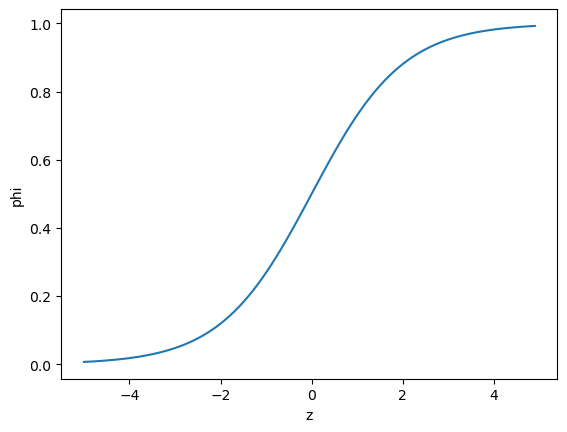

In [3]:
# 로지스틱 함수 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- z가 2일 때 80%의 확률로 사건이 일어남 (1)

# 1. 데이터 준비

In [4]:
df = pd.read_csv("FISH.csv")
# 농어와 빙어 데이터만 사용 
df_bs = df[(df['Species']=='Bream') | (df['Species']=='Smelt')]
df_bs.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Length1 칼럼 제거 
df_bs = df_bs[['Species', 'Weight', 'Length2', 'Length3', 'Height', 'Width']]
df_bs.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [7]:
x = df_bs.drop('Species', axis=1)
y = df_bs['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                    stratify=y, # 35:14로 비율 맞춰주기
                                                   random_state=4)

x_train.shape, x_test.shape

((36, 5), (13, 5))

In [8]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

# 2. 모델 훈련

In [9]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

# 3. 예측

In [10]:
logi.predict(scaled_test)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [11]:
# 예측확률 출력
logi.predict_proba(scaled_test)[:5]

array([[0.97148899, 0.02851101],
       [0.04079957, 0.95920043],
       [0.99616728, 0.00383272],
       [0.95984921, 0.04015079],
       [0.96947094, 0.03052906]])

- 원래는 오른쪽의 1일 확률만 계산하는데, 그걸 그냥 1에서 빼서 나옴 

In [12]:
# 종속변수 값 확인 
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

- 0번이 Bream, 1번이 Smelt 

In [13]:
# 로지스틱 회귀의 회귀식 확인 
logi.coef_, logi.intercept_

(array([[-0.57696306, -0.77084508, -0.80633017, -0.85006795, -0.79827986]]),
 array([-2.70376518]))

In [14]:
x_train.columns

Index(['Weight', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

- z = Weight * -0.58 + Length2 * -0.77 + Length3 * -0.81 + Height * -0.85 + Width * -0.8    + (-2.7)

### 회귀식을 통한 확률값 계산

In [15]:
# z값 계산 
decision_z = logi.decision_function(scaled_test[:5])
decision_z

array([-3.5285396 ,  3.15742852, -5.56034138, -3.17413406, -3.45807148])

In [16]:
scaled_test[:5]

array([[-0.09071436,  0.22112041,  0.2702087 ,  0.35347067,  0.23589742],
       [-1.38477204, -1.53268652, -1.54283418, -1.55303657, -1.64923011],
       [ 0.7030057 ,  0.708289  ,  0.7255391 ,  0.73425513,  0.87161911],
       [-0.2670966 ,  0.22112041,  0.26192996,  0.13780214,  0.15743971],
       [-0.09071436,  0.19189029,  0.23709376,  0.28844214,  0.27854413]])

- 1) z가 -3.52일때, smelt일 확률이 10%도 안됨.(2%) 
- 2) z가 3.15일때, smelt일 확률이 90%가 넘어감. (95%)
- ... 
    - 이렇게 z값을 로지스틱 함수에 집어넣고 나온 확률값이 결과..! 

In [17]:
# z값을 시그모이드 함수(=로지스틱 함수)를 통과시켜 확률값 계산 
expit(decision_z) # expit이 로지스틱 함수 !! 

array([0.02851101, 0.95920043, 0.00383272, 0.04015079, 0.03052906])

# <로지스틱 회귀로 다중 분류> 

- 도미일 확률, 빙어일 확률, 농어일 확률 을 각각 계산했을 때 
    - ex. 0.1 / 0.5 / 0.4 --> "빙어겠군" 이런식으로 예측 가능 

In [18]:
df = df[['Species', 'Weight', 'Length2', 'Length3', 'Height', 'Width']]
x = df.drop('Species',axis=1)
y = df['Species'] # 7가지 종류의 생선 

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                   stratify=y,
                                                   random_state=4)

x_train.shape, x_test.shape

((119, 5), (40, 5))

In [20]:
y.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [19]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.8067226890756303
0.825


In [21]:
logi.predict(scaled_test)

array(['Perch', 'Bream', 'Perch', 'Smelt', 'Perch', 'Smelt', 'Perch',
       'Parkki', 'Bream', 'Perch', 'Perch', 'Smelt', 'Bream', 'Perch',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Pike', 'Perch',
       'Parkki', 'Bream', 'Perch', 'Bream', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Perch', 'Perch', 'Pike', 'Perch', 'Perch',
       'Perch', 'Parkki', 'Perch', 'Pike', 'Perch'], dtype=object)

In [23]:
# 예측확률값 확인 
proba = logi.predict_proba(scaled_test[:5])
print(np.round(proba, decimals=3))

[[0.009 0.064 0.602 0.021 0.258 0.018 0.028]
 [0.932 0.028 0.007 0.005 0.007 0.    0.021]
 [0.041 0.055 0.547 0.068 0.228 0.002 0.06 ]
 [0.    0.049 0.143 0.002 0.088 0.714 0.002]
 [0.007 0.129 0.439 0.013 0.31  0.082 0.019]]


- 첫 번째 데이터는 2번째 클래스일 확률이 60%로 가장 높음 --> "Perch"
- 두 번째 데이터는 1번째 클래스일 확률이 93%로 가장 높음 --> "Bream"
- ... 

In [24]:
# 종속변수 확인 
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [25]:
# 회귀식 확인 
logi.coef_

array([[ 0.03466818, -0.14426458,  0.59447569,  2.87750097, -0.32660901],
       [-0.42664549, -0.68816025, -0.66056168,  1.84659393, -0.70298749],
       [ 1.051147  ,  0.23258994, -1.31369402, -1.873154  ,  1.96370622],
       [-0.08529506,  1.76189614,  1.71727333, -1.22798479, -0.72536922],
       [-0.87958312, -0.3986401 ,  0.31522013, -0.3711218 ,  0.58065257],
       [-0.3172497 , -0.77847619, -0.75299294, -1.2619235 , -1.66094845],
       [ 0.62295819,  0.01505504,  0.10027948,  0.01008918,  0.87155537]])

In [26]:
logi.intercept_

array([ 0.49493769, -0.0171718 ,  2.22732827,  0.02106828,  0.96085809,
       -4.10510449,  0.41808396])

- 각각 'Bream'의 확률을 계산하는 회귀식의 계수들과 절편, 'Parkki'의 회귀식의 계수들과 절편 .... 
- 현재의 로지스틱 다중분류에서 독립변수는 5개를 사용하기 때문에 coef_ 배열의 열은 5개임. 
- 종속변수의 범주 수가 7개이기 때문에 coef_ 행과 intercept_의 행은 7개 임.
    - 즉, "로지스틱 다중분류는 각 클래스마다 z값을 계산함 !"
    - 이때 확률값은 각각의 z값을 합이 1이 되도록 압축하기 위해 소프트맥스 함수를 사용 

- z('Bream') = Weight * 0.03 + Length2 * -0.14 + Length3 * 0.59 + Height * 2.87 + Width * -0.32 + (0.49)
- z('Parkki') = ......
- ......

### 회귀식을 통한 확률값 계산

In [27]:
decision_z = logi.decision_function(scaled_test[:5])
np.round(decision_z, decimals=2)

array([[-1.75,  0.22,  2.46, -0.88,  1.62, -1.06, -0.61],
       [ 5.  ,  1.51,  0.08, -0.28,  0.14, -7.65,  1.2 ],
       [-0.37, -0.09,  2.21,  0.12,  1.34, -3.19, -0.01],
       [-4.13,  0.99,  2.06, -2.09,  1.58,  3.67, -2.08],
       [-2.12,  0.77,  2.  , -1.5 ,  1.65,  0.32, -1.12]])

- 전체 총합 비율을 100%로 맞춰주는 과정을 "소프트맥스" 라고 함 !! 
- [소프트맥스 계산 과정]
    - 각각의 확률값 다 더하고, 그 합계 분의 특정한 한 범주 --> 해당 비율이 됨. 

In [29]:
proba = softmax(decision_z, axis=1)
np.round(proba, decimals=3)

array([[0.009, 0.064, 0.602, 0.021, 0.258, 0.018, 0.028],
       [0.932, 0.028, 0.007, 0.005, 0.007, 0.   , 0.021],
       [0.041, 0.055, 0.547, 0.068, 0.228, 0.002, 0.06 ],
       [0.   , 0.049, 0.143, 0.002, 0.088, 0.714, 0.002],
       [0.007, 0.129, 0.439, 0.013, 0.31 , 0.082, 0.019]])

- 바로 이것이 "predict_proba" 한 것과 동일한 결과 ! 

# 정리 

- 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용
- 방정식의 값을 0~1 사이로 압축 
    - 해당 값을 0~100% 사이의 확률로 이해 가능! 
- 이진 분류
    1. 하나의 선형 방정식을 훈련
    2. 출력값을 "시그모이드 함수"에 통과시켜 0~1 사이의 값을 만듦.
    3. 2번의 출력값이 양성 클래스에 대한 확률 
- 다중 분류 
    1. 클래스 개수만큼 방정식 훈련 
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산 
    3. 2번의 출력값이 각 클래스에 대한 확률값